In [150]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = pd.read_csv('/content/BlackFriday.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df.shape

(67760, 12)

In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
67755,1004374,P00180642,M,18-25,4.0,B,1,0.0,11.0,NaN,NaN,7544.0
67756,1004374,P00127942,M,18-25,4.0,B,1,0.0,1.0,2.0,5.0,15391.0
67757,1004375,P00057442,F,26-35,5.0,B,1,0.0,5.0,14.0,16.0,8611.0
67758,1004375,P00130442,F,26-35,5.0,B,1,0.0,3.0,5.0,NaN,10649.0
67759,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.776000e+04,67759.000000,67759.000000,67759.000000,46523.000000,20613.000000,67759.000000
mean,1.002666e+06,8.150519,0.403651,5.299075,9.874686,12.709504,9295.979899
std,4.172374e+03,6.534518,0.490633,3.731052,5.076390,4.109106,4962.435754
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002643e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.003902e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12044.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


In [ ]:
df.columns[df.isna().any()]

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

***Handling Missing Values***

In [ ]:
df.isnull().sum()

User_ID                           0
Product_ID                        1
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            21237
Product_Category_3            47147
Purchase                          1
dtype: int64

In [ ]:
df.Product_Category_2.fillna(0, inplace=True)
df.Product_Category_3.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            1
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
df.shape

(67759, 12)

In [ ]:
df.nunique()

User_ID                        5614
Product_ID                     3187
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      12715
dtype: int64

**Data Analysis**

In [ ]:
df.Occupation = df.Occupation.astype('int32')
df.Occupation.dtypes

dtype('int32')

In [ ]:
df.Product_Category_1 = df.Product_Category_1.astype('int32')
df.Product_Category_2 = df.Product_Category_2.astype('int32')
df.Product_Category_3 = df.Product_Category_3.astype('int32')

In [ ]:
df.Gender.value_counts()

M    51573
F    16186
Name: Gender, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

0.0    40408
1.0    27351
Name: Marital_Status, dtype: int64

In [ ]:
df.Age.value_counts()

26-35    26757
36-45    13549
18-25    12782
46-50     5408
51-55     4803
55+       2677
0-17      1783
Name: Age, dtype: int64

In [ ]:
df.Occupation.value_counts()

4     9104
0     8648
7     7256
1     5448
17    5026
20    4205
12    3829
14    3456
2     3120
16    3043
6     2448
3     2290
10    1563
11    1481
15    1455
5     1412
19    1076
13    1035
18     886
9      778
8      200
Name: Occupation, dtype: int64

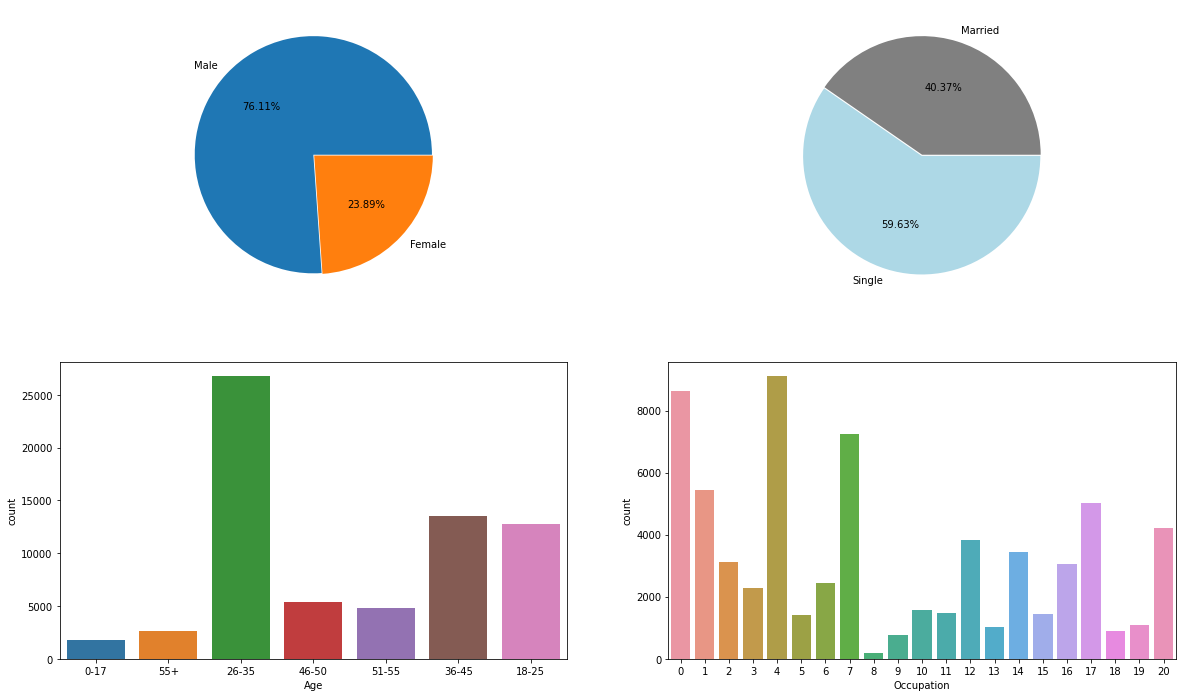

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
male = df.Gender[df.Gender == 'M'].count()
female = df.Gender[df.Gender == 'F'].count()
plt.pie([male, female], labels=['Male', 'Female'], explode=(0,0.01), autopct="%.2f%%")

plt.subplot(2,2,2)
married = df.Marital_Status[df.Marital_Status == 1].count()
single = df.Marital_Status[df.Marital_Status == 0].count()
plt.pie([married, single], labels=['Married', 'Single'], explode=(0,0.01), autopct="%.2f%%", colors=['grey', 'lightblue'])

plt.subplot(2,2,3)
sns.countplot(x='Age', data=df)

plt.subplot(2,2,4)
sns.countplot(x='Occupation', label=True,data=df)

***- there is 76.11% male and 23.89% Female buyers from the store*** <br>
***- The age group between 26-35 years is the most popular in the store most purchases are made by people between 18 to 45 age group***<br>
***- About 60% of the buyers are singels and 40% are married*** <br>
***- we do not known to each occupation each number corresponds, is difficult to make any analysis.***

In [ ]:
df.Product_Category_1.value_counts()

5     18955
1     17335
8     14186
11     3143
2      2959
6      2473
3      2426
4      1424
16     1167
15      777
13      666
10      603
12      482
7       470
18      361
14      192
17       78
9        62
Name: Product_Category_1, dtype: int64

In [ ]:
df.Product_Category_2.value_counts()

0     21236
8      7866
14     6873
2      5993
16     5390
15     4667
5      3255
4      3089
6      2086
11     1740
17     1648
13     1314
9       750
12      702
10      375
3       361
18      339
7        75
Name: Product_Category_2, dtype: int64

In [ ]:
df.Product_Category_3.value_counts()

0     47146
16     4054
15     3470
14     2278
17     2158
5      2004
8      1494
9      1438
12     1147
13      679
6       612
18      531
4       237
11      228
10      207
3        76
Name: Product_Category_3, dtype: int64

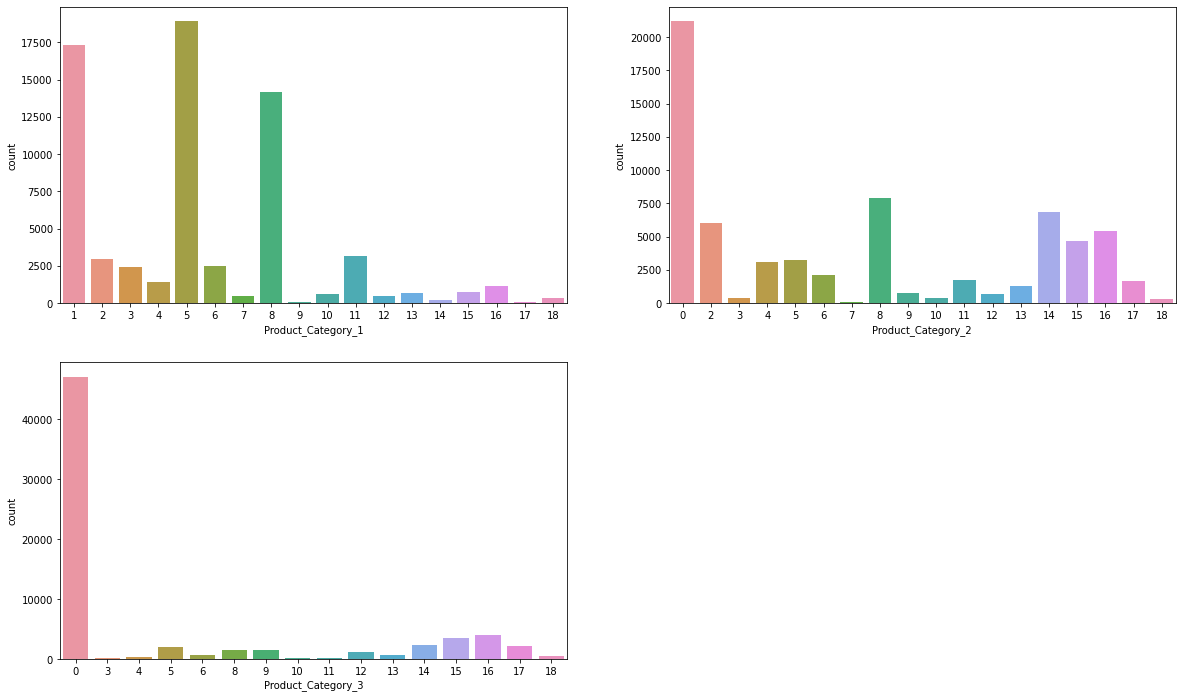

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='Product_Category_1', data=df)

plt.subplot(2,2,2)
sns.countplot(x='Product_Category_2', data=df)

plt.subplot(2,2,3)
sns.countplot(x='Product_Category_3', data=df)

***hint: we dont know the product names***<br>
***- In Product_Category_1 we have more products in numbers 1,5,8***<br>
***- In product_category_2 we have 8,2,14,15,16 products more but***<br>
***- In Product_category_3 we have more products in numbers 5,14,15,16,17***<br>
***- Peopole are more likely to come to the store and buy products only from product_Category_1 They are satisfied with this and do not buy products from other Categories***

In [ ]:
df.City_Category.value_counts()

B    28714
C    20845
A    18200
Name: City_Category, dtype: int64

In [ ]:
df.Stay_In_Current_City_Years.value_counts()

1     23622
2     12562
3     11779
4+    10598
0      9198
Name: Stay_In_Current_City_Years, dtype: int64

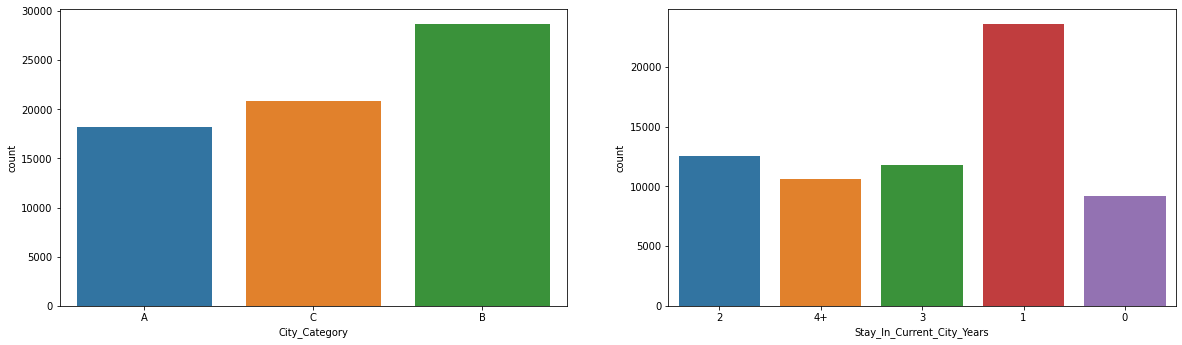

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot(x='City_Category', data=df)

plt.subplot(2,2,2)
sns.countplot(x='Stay_In_Current_City_Years', data=df)


***- Pepole from City_Category B are more likely to come to the store***<br>
***- It can be observed that, as people who are new in the the current city, they tend to visit the store more frequently***

In [ ]:
#Creating new column in the dataset 
df2 = df.copy()
df2.Marital_Status = df2.Marital_Status.apply(lambda x: 'Married' if x==1 else 'Single')
df2['Gender_MaritalStatus'] = df2.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
df2.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_MaritalStatus
0,1000001,P00069042,F,0-17,10,A,2,Single,3,0,0,8370.0,F_Single
1,1000001,P00248942,F,0-17,10,A,2,Single,1,6,14,15200.0,F_Single
2,1000001,P00087842,F,0-17,10,A,2,Single,12,0,0,1422.0,F_Single


In [ ]:
df2.Gender_MaritalStatus.value_counts()

M_Single     30881
M_Married    20692
F_Single      9527
F_Married     6659
Name: Gender_MaritalStatus, dtype: int64

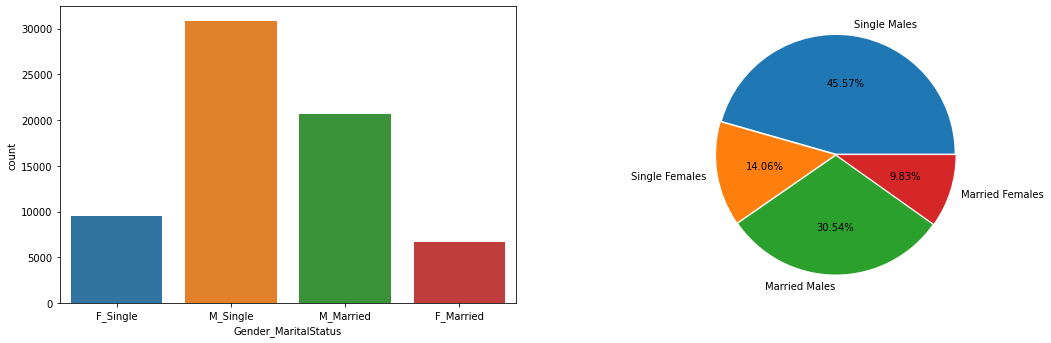

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Gender_MaritalStatus', data=df2);

# Visuiliaze with pie chart to see the ratio
plt.subplot(2,2,2)
m_single = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'M_Single'].count()
f_single = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'F_Single'].count()
m_married = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'M_Married'].count()
f_married = df2.Gender_MaritalStatus[df2.Gender_MaritalStatus == 'F_Married'].count()
labels = ['Single Males', 'Single Females', 'Married Males', 'Married Females']

plt.pie([m_single, f_single, m_married, f_married], labels=labels, autopct='%.2f%%', explode=(0.01,0.01,0.01,0.01))
plt.show()

***- Single Males are more likely to visit the store***<br>
***- Single female buyers are more in number than married ones***

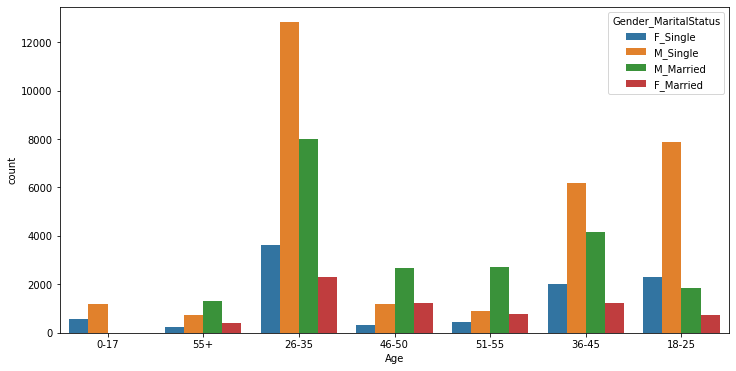

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Gender_MaritalStatus', data=df2);

***- Males (single and married) between the age group of 26-35 are major buyers***<br>
***- Single Males Between the age 18-45 are more likely to visit the store***




<Figure size 1440x864 with 0 Axes>

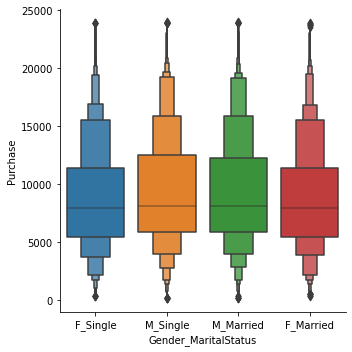

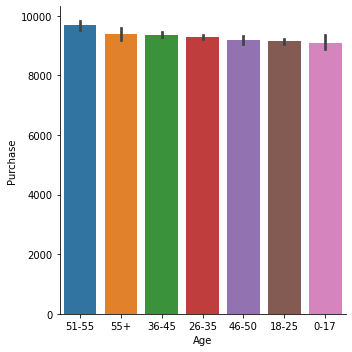

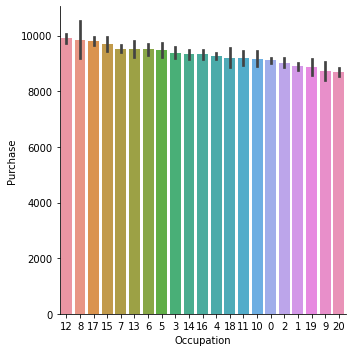

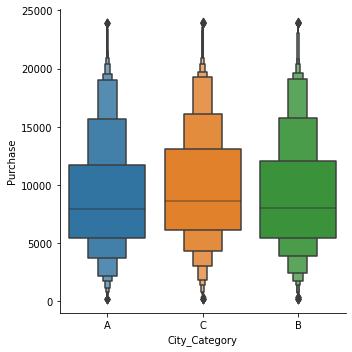

In [ ]:
plt.figure(figsize =(20,12))

sns.catplot(x='Gender_MaritalStatus', y='Purchase', data=df2, kind='boxen')

ordr_occ =df2.groupby(["Age"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Age', y='Purchase', order=ordr_occ, data = df2, kind='bar')

ordr_occ =df2.groupby(["Occupation"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Occupation', y='Purchase', order=ordr_occ, data=df2, kind='bar')


sns.catplot(x='City_Category', y='Purchase', data=df2, kind='boxen')


plt.show()


***- Males spend more than females***<br>
***- Age factor : People who have earned more (spend more time working) and have saved enough money, tend to spend more***<br>
***- Occupation codes 17, 12 and 15 appears to be earning more and accordingly spend more***<br>
***- People living in Category C city appears to spend more in the mall***

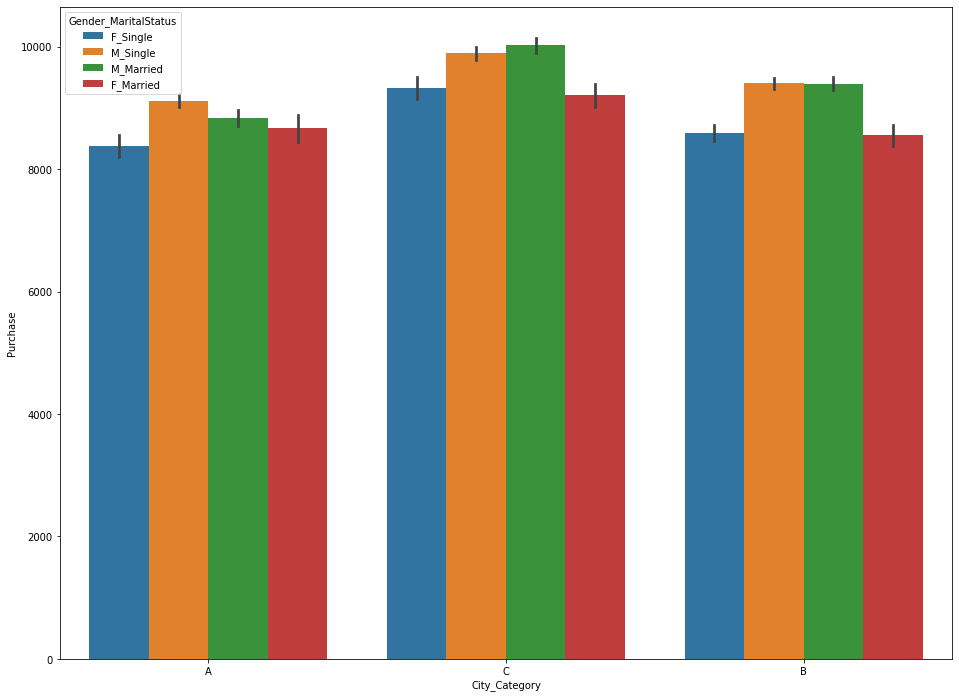

In [ ]:
plt.figure(figsize = (16,12))
sns.barplot(x='City_Category',y='Purchase',hue='Gender_MaritalStatus',data = df2);

***- in City_Category A,B,C Males (Single or Married) spends more***<br>
***- Females (Single or Married) in City Category C spends more***

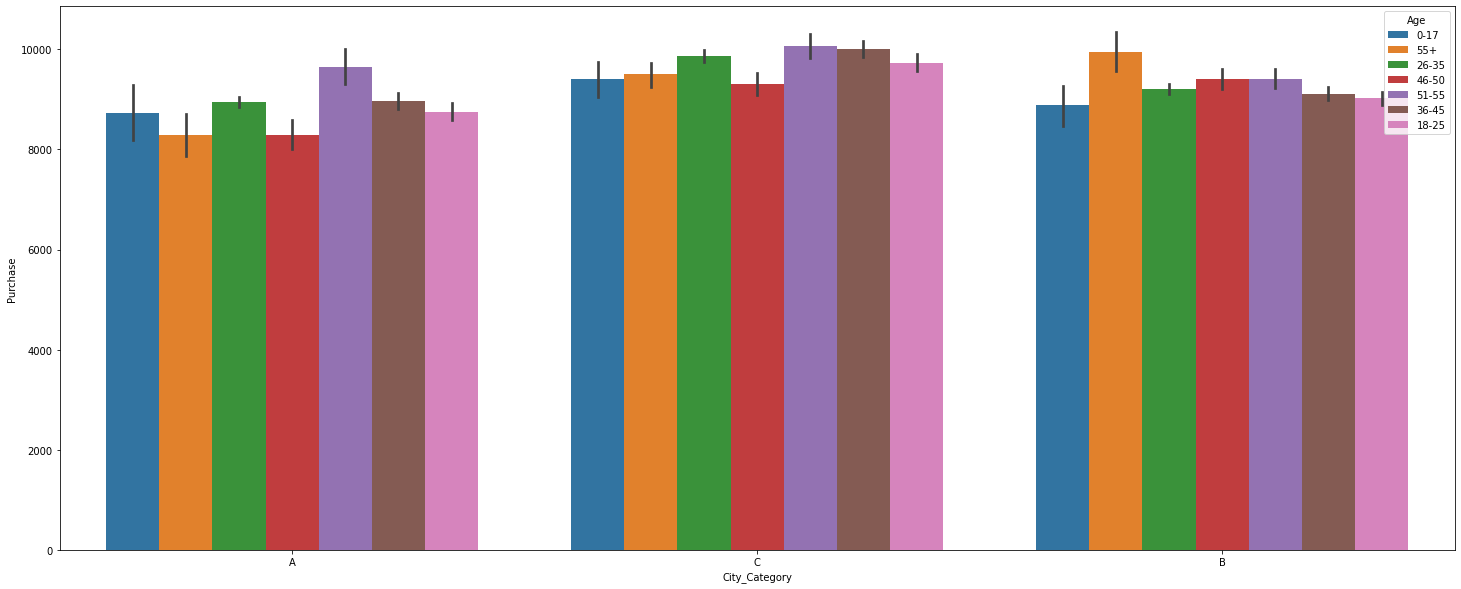

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(x='City_Category', y='Purchase',hue = 'Age',data = df);

***- In CITY_A more money spent by 51-55+ age group***<br>
***- In CITY_B money spent by all age groups are similar***<br>
***- In CITY_C more money spent by 56+ age group but overall more money sent by city_C.***

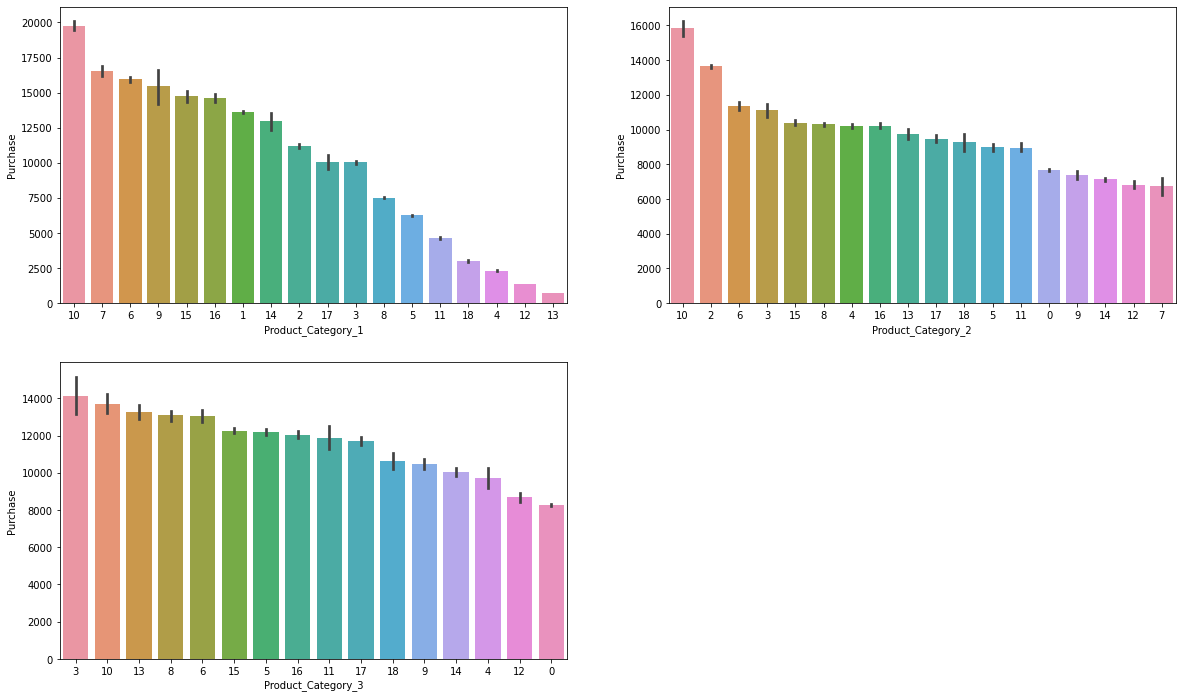

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
order = df.groupby('Product_Category_1').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_1',y='Purchase', data=df, order=order)

plt.subplot(2,2,2)
order = df.groupby('Product_Category_2').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_2', y='Purchase', data=df, order=order)

plt.subplot(2,2,3)
order = df.groupby('Product_Category_3').mean().sort_values(by='Purchase',ascending=False).index
sns.barplot(x='Product_Category_3', y='Purchase', data=df, order=order)

**Data PreProcessing**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,0,0,7969.0


In [ ]:
df3 = df.copy()
df3.drop(['User_ID', 'Product_ID'], axis=1, inplace=True) # non-important Featuers
df3.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0.0,3,0,0,8370.0
1,F,0-17,10,A,2,0.0,1,6,14,15200.0
2,F,0-17,10,A,2,0.0,12,0,0,1422.0


***Apply Label Encoder on Categorical Columns that the values can be ordered***

In [ ]:
encode_x = LabelEncoder()

In [ ]:
df3.Gender = encode_x.fit_transform(df3['Gender'])
df3.Age = encode_x.fit_transform(df3['Age'])
df3.City_Category = encode_x.fit_transform(df3['City_Category'])
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0.0,3,0,0,8370.0
1,0,0,10,0,2,0.0,1,6,14,15200.0
2,0,0,10,0,2,0.0,12,0,0,1422.0
3,0,0,10,0,2,0.0,12,14,0,1057.0
4,1,6,16,2,4+,0.0,8,0,0,7969.0


In [ ]:
df3.Marital_Status = df3.Marital_Status.astype('int32')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67759 entries, 0 to 67758
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      67759 non-null  int64  
 1   Age                         67759 non-null  int64  
 2   Occupation                  67759 non-null  int32  
 3   City_Category               67759 non-null  int64  
 4   Stay_In_Current_City_Years  67759 non-null  object 
 5   Marital_Status              67759 non-null  int32  
 6   Product_Category_1          67759 non-null  int32  
 7   Product_Category_2          67759 non-null  int32  
 8   Product_Category_3          67759 non-null  int32  
 9   Purchase                    67759 non-null  float64
dtypes: float64(1), int32(5), int64(3), object(1)
memory usage: 6.9+ MB


In [ ]:
df3.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df3.Stay_In_Current_City_Years = df3.Stay_In_Current_City_Years.replace('4+', 4)
df3.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370.0
1,0,0,10,0,2,0,1,6,14,15200.0
2,0,0,10,0,2,0,12,0,0,1422.0
3,0,0,10,0,2,0,12,14,0,1057.0
4,1,6,16,2,4,0,8,0,0,7969.0


In [ ]:
df3[df3.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase              1.000000
Product_Category_3    0.287245
City_Category         0.069453
Gender                0.059833
Product_Category_2    0.042987
Age                   0.019551
Occupation            0.014047
Marital_Status        0.000806
Product_Category_1   -0.320203
Name: Purchase, dtype: float64

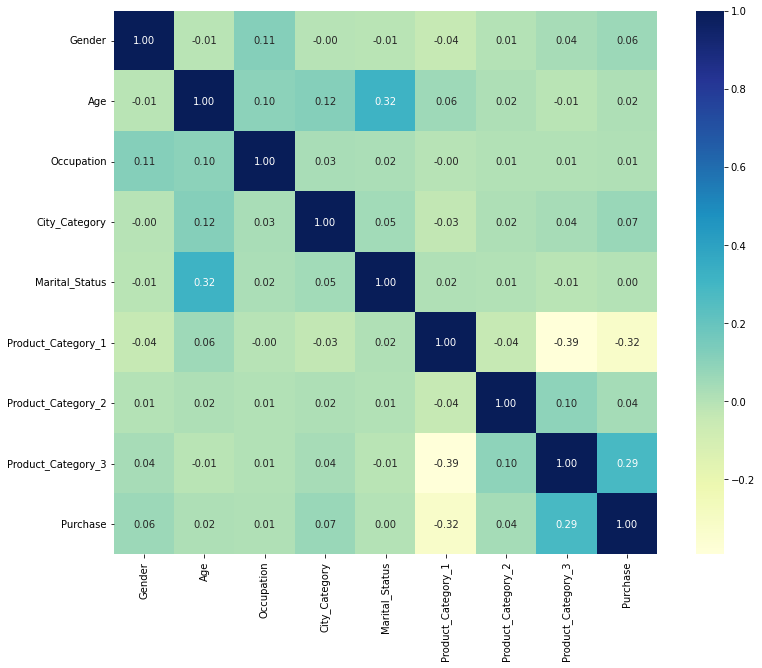

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df3.corr(), cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

**Based on the above visualizations and correlation matrix**<br><br>
**Observations:**<br><br>
***- there is 76.11% male and 23.89% Female buyers from the store*** <br>
***- The age group between 26-35 years is the most popular in the store most purchases are made by people between 18 to 45 age group***<br>
***- About 60% of the buyers are singels and 40% are married*** <br>
***- we do not known to each occupation each number corresponds, is difficult to make any analysis.***<br>
***- In Product_Category_1 we have more products in numbers 1,5,8***<br>
***- In product_category_2 we have 8,2,14,15,16 products more but***<br>
***- In Product_category_3 we have more products in numbers 5,14,15,16,17***<br>
***- Peopole are more likely to come to the store and buy products only from product_Category_1 They are satisfied with this and do not buy products from other Categories***<br>
***- Pepole from City_Category B are more likely to come to the store***<br>
***- It can be observed that, as people who are new in the the current city, they tend to visit the store more frequently***<br>
***- Single Males are more likely to visit the store***<br>
***- Single female buyers are more in number than married ones***<br>
***- Males (single and married) between the age group of 26-35 are major buyers***<br>
***- Single Males Between the age 18-45 are more likely to visit the store***<br>
***- Males spend more than females***<br>
***- Age factor : People who have earned more (spend more time working) and have saved enough money, tend to spend more***<br>
***- Occupation codes 17, 12 and 15 appears to be earning more and accordingly spend more***<br>
***- People living in Category C city appears to spend more in the mall***<br>
***- in City_Category A,B,C Males (Single or Married) spends more***<br>
***- Females (Single or Married) in City Category C spends more***<br>
***- In CITY_A more money spent by 51-55+ age group***<br>
***- In CITY_B money spent by all age groups are similar***<br>
***- In CITY_C more money spent by 56+ age group but overall more money sent by city_C.***<br><br><br>


**Conclusion:** <br><br>
**- it appears that the customer purchase behaviour mainly depends on 4 major factors:** <br>
  **a. City Category (Category C and B are more in number and spend more on items)**<Br>
  **b. Gender (Males (esp. unmarried) buy more than females)**<br>
  **c. Occupation (codes 4,0,7 are regular buyers, codes 17,12,15 spend more on items)**<br>
  **d. People Aged between 26-35 visit more and also spend more more on items
By observing the dataset, it appears that column Product Category 1 is the 'main' category type and other 2 columns indicating Product categories (2 & 3) are sub categories of the product. As there were quite a few missing values in Product category2 and Product Category3 (replaced by 0s) no particular insight can be provided.**

In [151]:
X = df3.drop('Purchase', axis=1)
y = df3.Purchase

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [243]:
model = GradientBoostingRegressor(n_estimators=700)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=700)

In [244]:
model.score(X_test, y_test)

0.6573352070284377